<a href="https://colab.research.google.com/github/harikrishnareddymallavarapu/PyTorch/blob/main/PyTorch_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
%config InlineBackend.figure.format ='retina'

import torch
import numpy as np
import helper
import matplotlib.pyplot as plt

# MNIST data set 
- Each image is converted to 28*28 pixel value
-transforms.Compose just clubs all the transforms provided to it. So, all the transforms in the transforms.Compose are applied to the input one by one.
-Normalize does the following for each channel:

  image = (image - mean) / std

  The parameters mean, std are passed as 0.5, 0.5 in your case. This will normalize the image in the range [-1,1]. For example, the minimum value 0 will be converted to (0-0.5)/0.5=-1, the maximum value of 1 will be converted to (1-0.5)/0.5=1.

  if you would like to get your image back in [0,1] range, you could use,

  image = ((image * std) + mean)

  Normalization helps get data within a range and reduces the skewness which helps learn faster and better

  Color images have three channels (red, green, blue), therefore you need three parameters to normalize each channel. The first tuple (0.5, 0.5, 0.5) is the mean for all three channels and the second (0.5, 0.5, 0.5) is the standard deviation for all three channels.

torchvision.transforms.Normalize(mean, std, inplace=False)

- Normalize a tensor image with mean and standard deviation. Given mean: (mean[1],...,mean[n]) and std: (std[1],..,std[n]) for n channels, this transform will normalize each channel of the input torch.*Tensor i.e., output[channel] = (input[channel] - mean[channel]) / std[channel]


In [2]:
from torchvision import datasets, transforms

In [3]:
#Defining the transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),])

In [4]:
#Download and load the training data
trainset = datasets.MNIST('MNIST-data/', download=True, train=True, transform=transform)
trainLoader = torch.utils.data.DataLoader(trainset, shuffle=True,batch_size=64)

Extracting MNIST-data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST-data/MNIST/raw


Extracting MNIST-data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST-data/MNIST/raw


Extracting MNIST-data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST-data/MNIST/raw


Extracting MNIST-data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST-data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
trainLoader

In [6]:
dataiter = iter(trainLoader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)



<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


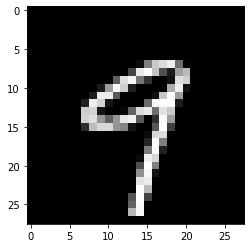

In [7]:
plt.imshow(images[1].numpy().squeeze(),cmap = 'Greys_r')

#Exercise 
- Flatten the batch of images,. Then build a multi layer network with 784 inputs and 256 hidden units and 10 output units using random tensors for wieghts and biases. Sigmoid layer as activation function for hidden layers and softmax in the output (this follows a probability distribution) 
- 10 outpus to identify the 10 digits

In [8]:
#Flatten the images
images[0].view(784,-1)

tensor([[-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.

In [9]:
images.shape

torch.Size([64, 1, 28, 28])

In [10]:
#Flattening the input images
input = images.view(images.shape[0],-1)
input.shape

torch.Size([64, 784])

In [11]:
#Creating weights and biases
#Layer 1 
weightsLayer1 = torch.randn(784,256)
biasLayer1 = torch.randn(256)

#Layer 2 
weightsLayer2 = torch.randn(256,10)
biasLayer2 = torch.randn(10)

In [12]:
def activation(x):
  return 1/(1+torch.exp(-x))

In [14]:
#Running the neural networ
hiddenOutput1 = activation(torch.mm(input,weightsLayer1)+ biasLayer1)
finalOutput = torch.mm(hiddenOutput1,weightsLayer2) + biasLayer2

In [15]:
def softMax(x):
  return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1,1)

In [22]:
torch.sum(torch.exp(finalOutput[0])).view(-1,1)

tensor(40354660.)

In [27]:
finalOutput[0]

tensor([ -5.6605,   0.1571,  17.5129,  -4.5016,  -1.8772,   0.2911,   9.5399,
          5.0532, -16.3180,   0.8334])

In [25]:
probabilities = softMax(finalOutput)
probabilities.shape

torch.Size([64, 10])

In [26]:
probabilities[0]

tensor([8.6253e-11, 2.8996e-08, 9.9965e-01, 2.7486e-10, 3.7917e-09, 3.3154e-08,
        3.4454e-04, 3.8786e-06, 2.0290e-15, 5.7024e-08])

#Building Netwroks with PyTorch

Rebuilding the above network using PyTorch nn module

In [30]:
from torch import nn

class MNISTNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.hiddenLayer = nn.Linear(784,256)
    self.finalOutput = nn.Linear(256,10)
    self.sigmoid = nn.Sigmoid()
    self.softMax = nn.Softmax(dim=1)

  def forward(self,x):
    #Pass the input tensor to each of the operations in a neural network
    x = self.hiddenLayer(x)
    x = self.sigmoid(x)
    x = self.finalOutput(x)
    x = self.softMax(x)
    return x

In [33]:
mnistNetwork = MNISTNetwork()
output = mnistNetwork.forward(input)

In [34]:
output.shape

torch.Size([64, 10])

In [36]:
import torch.nn.functional as F

#Using torch.nn.functional, we no need to initialise the activation functions, they cna be used directly from the function module

class MNISTNetwork2(nn.Module):
  def __init__(self):
    super().__init__()
    self.hiddenLayer = nn.Linear(784,256)
    self.finalOutput = nn.Linear(256,10)

  def forward(self,x):
    #Pass the input tensor to each of the operations in a neural network
    x = F.sigmoid(self.hiddenLayer(x))
    x = F.softmax(self.finalOutput(x))
    return x

In [38]:
mnistNetwork = MNISTNetwork2()
output = mnistNetwork.forward(input)
output[0]

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1625: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


tensor([0.1305, 0.0901, 0.1000, 0.0907, 0.0998, 0.1026, 0.0667, 0.1263, 0.0790,
        0.1143], grad_fn=<SelectBackward>)